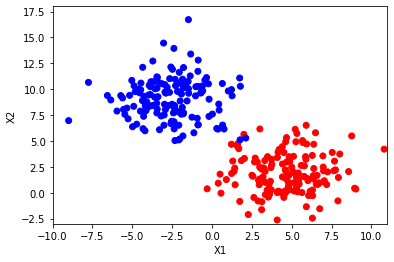

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=2, random_state=42)

plt.figure()

plt.ylim(-3, 18)
plt.xlim(-10, 11)

plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42).fit(X, y)

In [4]:
clf.intercept_

array([5.54082439])

In [5]:
clf.coef_

array([[ 1.25573957, -1.36083899]])

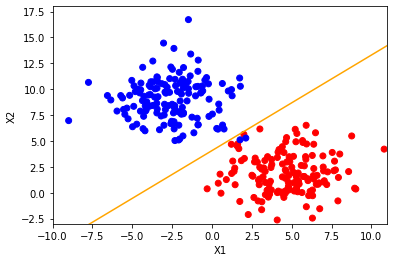

In [6]:
import numpy as np

plt.figure()

plt.ylim(-3, 18)
plt.xlim(-10, 11)

plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

line = np.linspace(-10, 12)
plt.plot(line, -(line * clf.coef_[0][0] + clf.intercept_) / clf.coef_[0][1], c='orange')

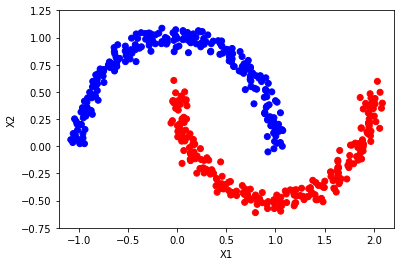

In [10]:
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=500, noise=.05, random_state=23)

plt.figure()

plt.ylim(-0.75, 1.25)
plt.xlim(-1.2, 2.2)

plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

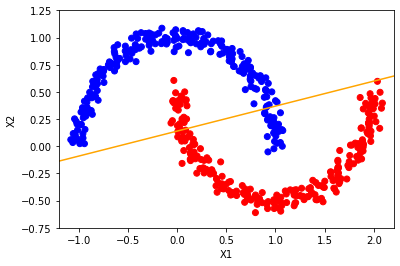

In [11]:
clf = LogisticRegression(random_state=42).fit(X, y)

plt.figure()

plt.ylim(-0.75, 1.25)
plt.xlim(-1.2, 2.2)

plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

line = np.linspace(-1.5, 2.5)
plt.plot(line, -(line * clf.coef_[0][0] + clf.intercept_) / clf.coef_[0][1], c='orange')

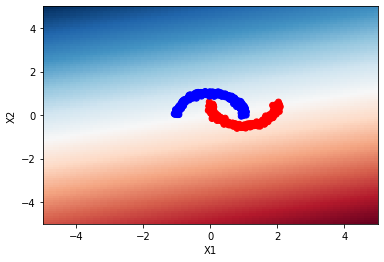

In [32]:
from sklearn.preprocessing import PolynomialFeatures

def draw_decision_function(clf,poly,ax):
  # 2D meshgrid
  xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
  Z = clf.decision_function(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
  # Decision Function of each mesh coordinate
  Z = Z.reshape(xx.shape) # reshape to 2D
  # Paint each mesh decision value
  ax.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
  return

poly = PolynomialFeatures(degree=1, include_bias=True)
poly.fit(X)
pX = poly.transform(X)


clf = LogisticRegression(random_state=42).fit(pX, y)

plt.figure()

draw_decision_function(clf, poly, plt)

#plt.ylim(-0.75, 1.25)
#plt.xlim(-1.2, 2.2)

plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

#line = np.linspace(-1.5, 2.5)
#plt.plot(line, -(line * clf.coef_[0][0] + clf.intercept_) / clf.coef_[0][1], c='orange')



In [ ]:
clf.coef_

In [ ]:
pX

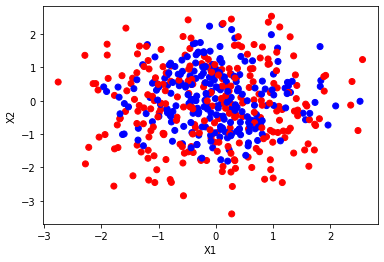

In [40]:
from sklearn.datasets import make_hastie_10_2


X, y = make_hastie_10_2(n_samples=500, random_state=23)

plt.figure()


plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)